# Estudi KMeans

## Lectura fitxer students

In [1]:
import pandas as pd

df = pd.read_csv("datasets/Data Carrard.csv")
df = df.drop('id', axis = 1)

In [2]:
df['target'] = df['stai_t'] + df['cesd']
df = df.drop(['stai_t', 'cesd'], axis=1)

In [3]:
X = df.drop('target', axis=1)
y = df['target']

In [8]:
X

,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,mbi_ex,mbi_cy,mbi_ea
0,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,17,13,20
1,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,14,11,26
2,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,24,7,23
3,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,16,10,21
4,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,22,14,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,21,2,1,1,1,0,45,3,0,106,63,39,28,0.619048,23,4,34
882,20,2,2,1,0,0,13,3,0,113,67,40,21,0.809524,17,5,24
883,19,1,1,1,0,0,50,5,0,100,50,31,24,0.547619,15,8,31
884,24,5,2,1,0,0,20,2,1,120,64,39,21,0.785714,22,15,19


## Aplicació model

### Utilització de totes les característiques
Fent 2 agrupacions per determinar si necessiten o no assitència mèdica. 

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df_num_scaled = scaler.fit_transform(df)

In [16]:
n_grups=2
model = KMeans(n_clusters=n_grups)
clusters = model.fit_predict(X)

c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [17]:
df_clustered = X.copy() 
df_clustered['cluster'] = clusters 
df_clustered.head(5) 

,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,mbi_ex,mbi_cy,mbi_ea,cluster
0,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,17,13,20,1
1,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,14,11,26,0
2,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,24,7,23,0
3,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,16,10,21,0
4,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,22,14,23,0


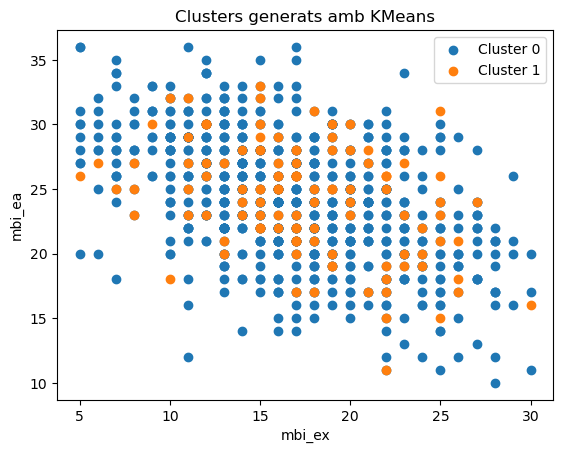

In [19]:
# Plot dels punts amb diferents colors segons el cluster al qual pertanyen
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['mbi_ea'], label=f'Cluster {i}')

plt.title('Clusters generats amb KMeans')
plt.xlabel('mbi_ex')
plt.ylabel('mbi_ea')
plt.legend()
plt.show()

In [20]:
# Grouping the data frame by cluster to get the properties of each cluster
cluster_grouped = df_clustered.groupby('cluster')
cluster_properties = cluster_grouped.mean()

# Printing the properties of each cluster (mean values of the variables)
print(cluster_properties)

               age      year       sex      glang      part       job  \
cluster                                                                 
0        22.359638  3.169470  1.694696   2.241915  0.573092  0.360931   
1        22.548673  2.646018  1.699115  97.000000  0.495575  0.265487   

            stud_h    health      psyt        jspe   qcae_cog   qcae_aff  \
cluster                                                                    
0        24.936611  3.783959  0.231565  106.712807  58.703752  34.971539   
1        27.699115  3.734513  0.176991  104.061947  57.309735  33.504425   

              amsp  erec_mean     mbi_ex     mbi_cy     mbi_ea  
cluster                                                         
0        23.241915   0.723064  16.813713  10.024580  24.209573  
1        22.522124   0.700169  17.318584  10.451327  24.194690  


In [21]:
# Getting the number of patients in each cluster
total_cluster = cluster_grouped.size()
total_cluster

cluster
0    773
1    113
dtype: int64

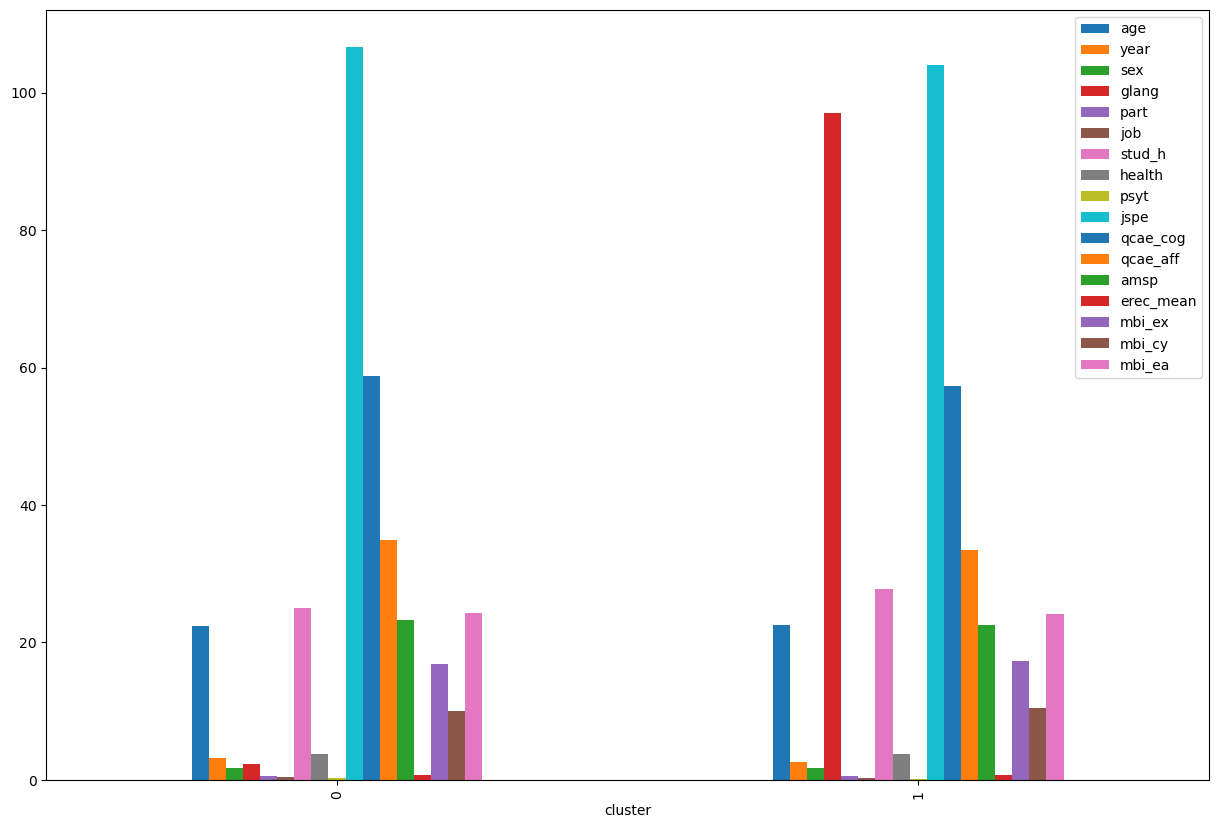

In [22]:
cluster_properties.plot(kind='bar', figsize=(15, 10))
plt.show()

**Comentari**


#### Avaluació model

Definim un _threshold_ per determinar a quin punt considerem que la persona en qüestió pateix ansietat o depressió, tenint en compte que la nostra _y_ és la suma de *escala de depressió* i *escala d'ansiestat*. Aquestes dues es mouen en l'interval:
* cesd: 0 a 56 
* stai_t: 20 a 77


In [24]:
cesd_max = 56
stai_t_max = 77
threshold = (cesd_max+stai_t_max)*0.6
threshold

79.8

In [25]:
# fem Dataset per avaluar el model 
df_aval = df_clustered.copy() 
df_aval['target'] = y
df_aval

,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,mbi_ex,mbi_cy,mbi_ea,cluster,target
0,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,17,13,20,1,95
1,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,14,11,26,0,40
2,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,24,7,23,0,98
3,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,16,10,21,0,65
4,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,22,14,23,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,21,2,1,1,1,0,45,3,0,106,63,39,28,0.619048,23,4,34,0,80
882,20,2,2,1,0,0,13,3,0,113,67,40,21,0.809524,17,5,24,0,67
883,19,1,1,1,0,0,50,5,0,100,50,31,24,0.547619,15,8,31,0,59
884,24,5,2,1,0,0,20,2,1,120,64,39,21,0.785714,22,15,19,0,91


In [26]:
# Filtrem les files amb 'target' superior a threshold
df_target_gt_threshold = df_aval[df_aval['target'] > threshold]

# Fem el recompte agrupant per 'cluster'
count_by_cluster = df_target_gt_threshold.groupby('cluster').size()

# Mostrem el resultat
print("Recompte estudiants que necessiten ajuda\n", count_by_cluster)

print("\nRecompte estudiants totals en cluster\n", total_cluster)

Recompte estudiants que necessiten ajuda
 cluster
0    151
1     28
dtype: int64

Recompte estudiants totals en cluster
 cluster
0    773
1    113
dtype: int64


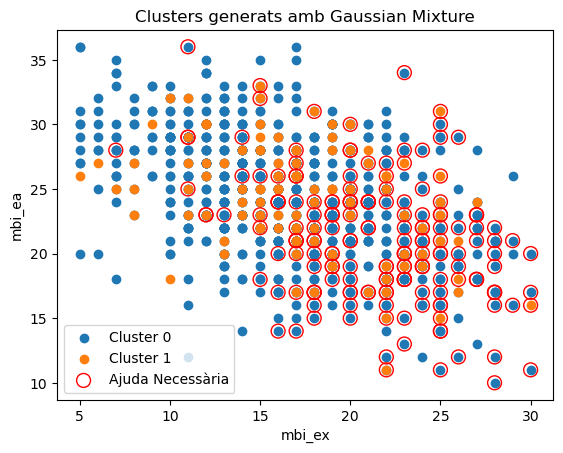

In [27]:
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['mbi_ea'], label=f'Cluster {i}')

# Plot dels punts que superen el llindar amb marques diferents (per exemple, cercles buits)
plt.scatter(df_target_gt_threshold['mbi_ex'], df_target_gt_threshold['mbi_ea'], label='Ajuda Necessària', facecolors='none', edgecolors='r', marker='o', s=100)

plt.title('Clusters generats amb Gaussian Mixture')
plt.xlabel('mbi_ex')
plt.ylabel('mbi_ea')
plt.legend()
plt.show()

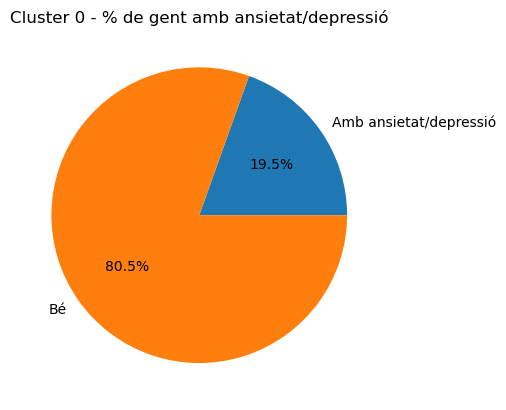

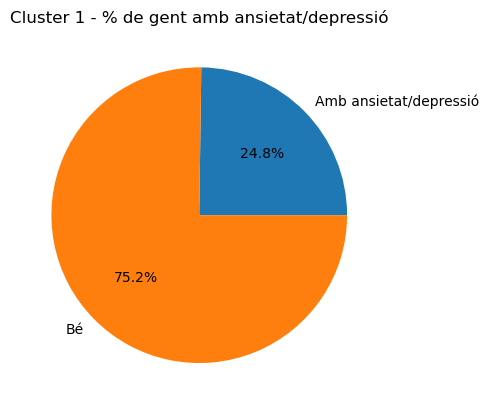

In [28]:
labels = 'Amb ansietat/depressió', 'Bé'
dades = []
for c in range(n_grups):
    resta = total_cluster[c] - count_by_cluster[c]
    dades.append([count_by_cluster[c], resta])

for i, d in enumerate(dades):
    fig, ax = plt.subplots()
    ax.pie(d, labels=labels, autopct='%1.1f%%')
    ax.set_title(f'Cluster {i} - % de gent amb ansietat/depressió')
    plt.show()

**Conclusions**


### Utilització de les característiques més rellevants
Fent 2 agrupacions per determinar si necessiten o no assitència mèdica. 

#### Random forest

Recordem que els coeficients amb Random Forest dels diferents atributs eren:

|    | atribut   | importancia |
|----|-----------|-------------|
| 9  | jspe      | 0.086444    |
| 10 | qcae_cog  | 0.084919    |
| 6  | stud_h    | 0.084754    |
| 11 | qcae_aff  | 0.082221    |
| 14 | mbi_ex    | 0.079569    |
| 12 | amsp      | 0.079371    |
| 13 | erec_mean | 0.078246    |
| 16 | mbi_ea    | 0.078138    |
| 15 | mbi_cy    | 0.073213    |
| 0  | age       | 0.067432    |
| 1  | year      | 0.048998    |
| 7  | health    | 0.041126    |
| 3  | glang     | 0.027404    |
| 4  | part      | 0.026077    |
| 5  | job       | 0.022708    |
| 2  | sex       | 0.021316    |
| 8  | psyt      | 0.018066    |

Per fer aquesta part ens quedarem els atributs que tenen l'importància major a **0.060000**

In [29]:
import pandas as pd

df = pd.read_csv("datasets/Data Carrard.csv")
df = df.drop('id', axis = 1)
df['target'] = df['stai_t'] + df['cesd']
df = df.drop(['stai_t', 'cesd'], axis=1)
X = df.drop('target', axis=1)
y = df['target']

In [30]:
# X Random Forest
X_rf = X[['jspe', 'qcae_cog', 'stud_h', 'qcae_aff', 'mbi_ex', 'amsp', 'erec_mean', 'mbi_ea', 'mbi_cy', 'age']]

In [31]:
n_grups=2
model = KMeans(n_clusters=n_grups)
clusters = model.fit_predict(X)

c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [32]:
df_clustered = X_rf.copy() 
df_clustered['cluster'] = clusters 
df_clustered.head(5) 

,jspe,qcae_cog,stud_h,qcae_aff,mbi_ex,amsp,erec_mean,mbi_ea,mbi_cy,age,cluster
0,88,62,56,27,17,17,0.738095,20,13,18,1
1,109,55,20,37,14,22,0.690476,26,11,26,0
2,106,64,36,39,24,17,0.690476,23,7,21,0
3,101,52,51,33,16,18,0.833333,21,10,21,0
4,102,58,22,28,22,21,0.690476,23,14,21,0


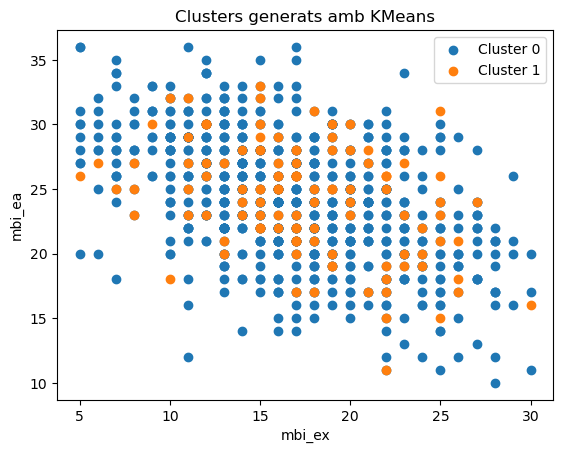

In [34]:
# Plot dels punts amb diferents colors segons el cluster al qual pertanyen
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['mbi_ea'], label=f'Cluster {i}')

plt.title('Clusters generats amb KMeans')
plt.xlabel('mbi_ex')
plt.ylabel('mbi_ea')
plt.legend()
plt.show()

In [35]:
# Grouping the data frame by cluster to get the properties of each cluster
cluster_grouped = df_clustered.groupby('cluster')
cluster_properties = cluster_grouped.mean()

# Printing the properties of each cluster (mean values of the variables)
print(cluster_properties)

               jspe   qcae_cog     stud_h   qcae_aff     mbi_ex       amsp  \
cluster                                                                      
0        106.712807  58.703752  24.936611  34.971539  16.813713  23.241915   
1        104.061947  57.309735  27.699115  33.504425  17.318584  22.522124   

         erec_mean     mbi_ea     mbi_cy        age  
cluster                                              
0         0.723064  24.209573  10.024580  22.359638  
1         0.700169  24.194690  10.451327  22.548673  


In [36]:
# Getting the number of patients in each cluster
total_cluster = cluster_grouped.size()
total_cluster

cluster
0    773
1    113
dtype: int64

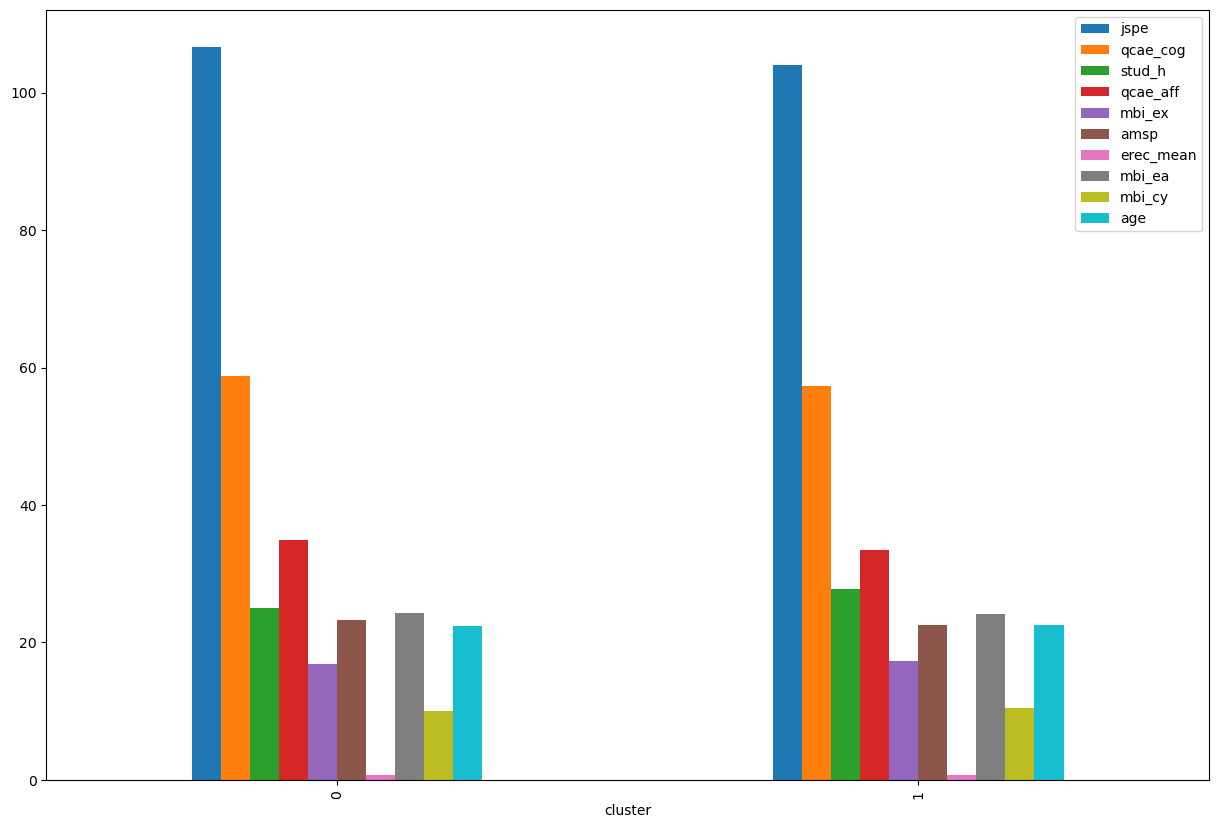

In [37]:
cluster_properties.plot(kind='bar', figsize=(15, 10))
plt.show()

##### Avaluació model

In [38]:
cesd_max = 56
stai_t_max = 77
threshold = (cesd_max+stai_t_max)*0.6
threshold

79.8

In [39]:
# fem Dataset per avaluar el model 
df_aval = df_clustered.copy() 
df_aval['target'] = y
df_aval

,jspe,qcae_cog,stud_h,qcae_aff,mbi_ex,amsp,erec_mean,mbi_ea,mbi_cy,age,cluster,target
0,88,62,56,27,17,17,0.738095,20,13,18,1,95
1,109,55,20,37,14,22,0.690476,26,11,26,0,40
2,106,64,36,39,24,17,0.690476,23,7,21,0,98
3,101,52,51,33,16,18,0.833333,21,10,21,0,65
4,102,58,22,28,22,21,0.690476,23,14,21,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...
881,106,63,45,39,23,28,0.619048,34,4,21,0,80
882,113,67,13,40,17,21,0.809524,24,5,20,0,67
883,100,50,50,31,15,24,0.547619,31,8,19,0,59
884,120,64,20,39,22,21,0.785714,19,15,24,0,91


In [40]:
# Filtrem les files amb 'target' superior a threshold
df_target_gt_threshold = df_aval[df_aval['target'] > threshold]

# Fem el recompte agrupant per 'cluster'
count_by_cluster = df_target_gt_threshold.groupby('cluster').size()

# Mostrem el resultat
print("Recompte estudiants que necessiten ajuda\n", count_by_cluster)

print("\nRecompte estudiants totals en cluster\n", total_cluster)

Recompte estudiants que necessiten ajuda
 cluster
0    151
1     28
dtype: int64

Recompte estudiants totals en cluster
 cluster
0    773
1    113
dtype: int64


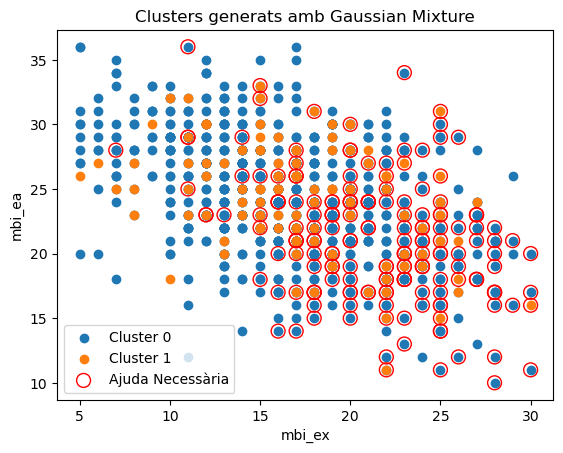

In [41]:
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['mbi_ea'], label=f'Cluster {i}')

# Plot dels punts que superen el llindar amb marques diferents (per exemple, cercles buits)
plt.scatter(df_target_gt_threshold['mbi_ex'], df_target_gt_threshold['mbi_ea'], label='Ajuda Necessària', facecolors='none', edgecolors='r', marker='o', s=100)

plt.title('Clusters generats amb Gaussian Mixture')
plt.xlabel('mbi_ex')
plt.ylabel('mbi_ea')
plt.legend()
plt.show()

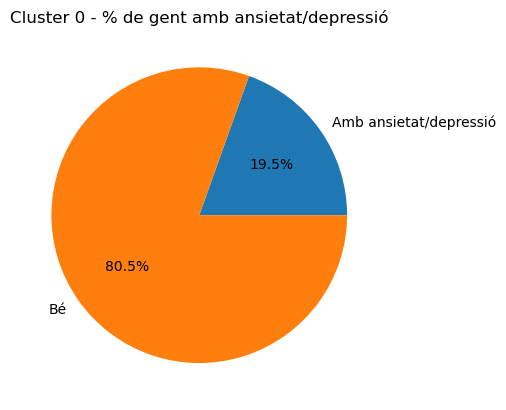

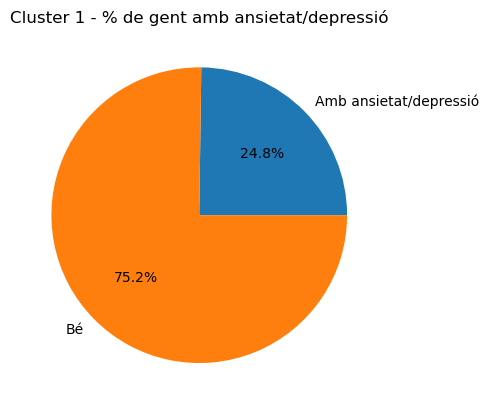

In [42]:
labels = 'Amb ansietat/depressió', 'Bé'
dades = []
for c in range(n_grups):
    resta = total_cluster[c] - count_by_cluster[c]
    dades.append([count_by_cluster[c], resta])

for i, d in enumerate(dades):
    fig, ax = plt.subplots()
    ax.pie(d, labels=labels, autopct='%1.1f%%')
    ax.set_title(f'Cluster {i} - % de gent amb ansietat/depressió')
    plt.show()